In [1]:
flex_title = "Popotte Duck Analytics"
# flex_custom_css = "C:\\Users\\rhilb\\Dropbox\\ED\\Popotte\\dashboard\\css.css"
flex_custom_css = "css.css"

flex_subtitle = "by La Fabrique à Popotte"
# flex_orientation = "rows"

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

import folium
import json

In [4]:
import ipywidgets as widgets

In [5]:
profils = pd.read_csv("data/profils.csv", sep=";")
evenements = pd.read_csv("data/evenements.csv", sep=";", parse_dates=['planification','inventaire','execution'])
recettes = pd.read_csv('data/recette.csv', sep=';')


In [6]:
list_regions = np.sort(profils.nom_region.unique())
list_regions = np.insert(list_regions,0,' ')

list_groupes = np.sort(evenements.groupe.unique())
list_groupes = np.insert(list_groupes,0,' ')

# Focus Produits

## Sidebar

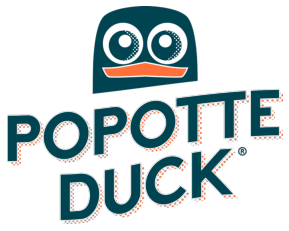

In [7]:
print("\n")
logo = plt.imread('images/LOGO-1024x809.png')
plt.imshow(logo);
plt.axis('off');

w = widgets.Dropdown(
    options=tuple(list_regions),
    value=' ',
    description='Région:',
    disabled=False,
)

def filter_region(change):
    print (change.new)
    
w.observe(filter_region, names='value')
w

In [8]:
w = widgets.Dropdown(
    options=tuple(list_groupes),
    value=' ',
    description='Cat. FMCG:',
    disabled=False,
)

w

Dropdown(description='Cat. FMCG:', options=(' ', 'assaisonnement', 'boissons', 'céréales', 'fruits', 'fruits à…

## Ligne 1

### Par qui ?

In [9]:
regions = json.load(open("./data/regions.geojson",'rb'))

m = folium.Map(location=[47, 3], zoom_start=5)

count_data = pd.read_csv('./data/profils.csv', sep=';').groupby('nom_region').agg({"id" : 'count'}).rename_axis("nom").reset_index()

folium.Choropleth(
    geo_data=regions,
    name="Panel",
    data=count_data,
    columns=["nom", "id"],
    key_on="properties.nom",
     fill_color="Greens",
#     fill_opacity=0.7,
#     line_opacity=0.2,
    legend_name="Utilisateurs",
).add_to(m)

Text(0, 0.5, '')

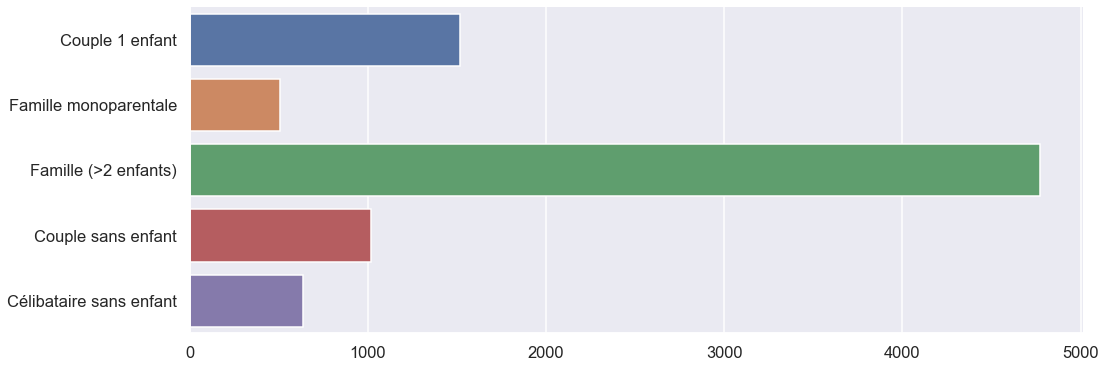

In [10]:
sns.set()
sns.set_context('talk')

plt.figure(figsize=(16,6))
sns.countplot(data=profils, y='typologie')
sns.despine();
plt.xlabel('');
plt.ylabel('');

### Où ?

In [11]:
m

### Dans quelles recettes ?

In [12]:
print(recettes.titre.head(5).to_markdown())

|    | titre                                                        |
|---:|:-------------------------------------------------------------|
|  0 | Pêches caramélisées au romarin                               |
|  1 | GALETTES DE POMMES DE TERRE AU MUNSTER                       |
|  2 | Quiche à la dinde et champignons                             |
|  3 | Blinis au saumon et au concombre                             |
|  4 | Toast à l'avocat                                             |
|  5 | Brick oeuf fromage jambon                                    |
|  6 | Coquilles St Jacques gratinées                               |
|  7 | Aiguillettes de filet de dinde marinées à l'ail et au citron |
|  8 | salade avocat, pamplemousse, pomme et poulet                 |
|  9 | Tomates farcies au poulet et gruyère                         |


In [13]:
recettes.titre.head(10).values

array(['Pêches caramélisées au romarin',
       'GALETTES DE POMMES DE TERRE AU MUNSTER',
       'Quiche à la dinde et champignons',
       'Blinis au saumon et au concombre', "Toast à l'avocat",
       'Brick oeuf fromage jambon', 'Coquilles St Jacques gratinées',
       "Aiguillettes de filet de dinde marinées à l'ail et au citron",
       'salade avocat, pamplemousse, pomme et poulet',
       'Tomates farcies au poulet et gruyère'], dtype=object)

## 2e colonne : quand ?

### Année

### Semaine

### Journée

# Focus Consommateurs

## Sidebar

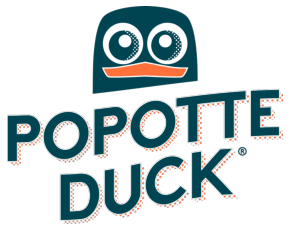

In [14]:
print("\n")
logo = plt.imread('images/LOGO-1024x809.png')
plt.imshow(logo);
plt.axis('off');

widgets

## 1st col

### Habitudes alimentaires

Aliments (wordcloud)

Recettes (dataframe)

In [15]:
pd.read_csv('./data/profils.csv', sep=";").head(5)

,id,nombremembre,typologie,anneenaissance,tempspreparationmaxpardefaut,cout,difficulte,residence_id,adresse,lieu,ville,complement,commune,code_postal,latitude,longitude,nom_region
0,2941,3,Couple 1 enfant,1990,30,PEU_CHER,MOYENNE,2941,NaN,Mon foyer,NaN,NaN,Montagny-lès-Beaune,21200,46.984920,4.853973,Bourgogne-Franche-Comté
1,3,3,Famille monoparentale,1961,30,PEU_CHER,MOYENNE,3,25 bd grenelle,Brad,Paris,NaN,Paris,75001,48.862630,2.336293,Île-de-France
2,4,6,Famille (>2 enfants),1984,30,PEU_CHER,MOYENNE,4,NaN,Mon foyer,NaN,NaN,Bonnat,23220,46.323019,1.913451,Nouvelle-Aquitaine
3,7,4,Famille (>2 enfants),1980,10080,PEU_CHER,MOYENNE,7,NaN,Mon foyer,NaN,NaN,Saint-Michel-sur-Orge,91240,48.632050,2.311703,Île-de-France
4,4854,3,Couple 1 enfant,1988,45,PEU_CHER,MOYENNE,4855,NaN,Mon foyer,NaN,NaN,Vertou,44120,47.160373,-1.470523,Pays de la Loire


### Inventaire

TreeMap + image frigo


## 2e colonne : quand ?

### Année

### Semaine

### Journée

# Focus Tendances

## Sidebar

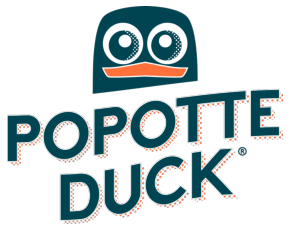

In [16]:
print("\n")
logo = plt.imread('images/LOGO-1024x809.png')
plt.imshow(logo);
plt.axis('off');

widgets

## Ligne

### Prévisions

body

### Analyses du modèle